## Fashion-MNIST dataset augmentation

### import packages

In [4]:
import warnings
warnings.filterwarnings('ignore')

# necessary packages
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random

# additional certain short functions
from torch import is_tensor
from matplotlib.pyplot import pause
from random import randint
from copy import deepcopy
from math import floor, ceil
from torch import stack
from torch import cat

## testing single data modification for moving simulation

ground truth =  Sandal
Dataset size =  60000


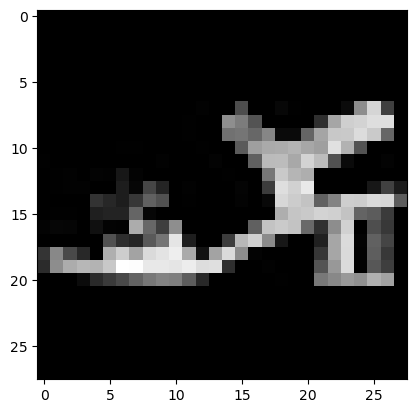

In [8]:
# get training dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# get testing dataset
testing_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# class names
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# print random item to visualize
rand = random.randint(0, 59999)
img = training_data.data[rand]
plt.imshow(img, cmap='gray')
print("ground truth = ", training_data.classes[training_data.targets[rand]])

# print dataset size 
size = len(training_data)
print("Dataset size = ", size)

### expand and clean

True
torch.Size([84, 112])


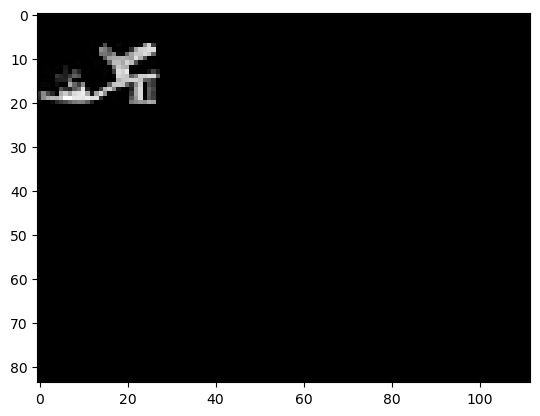

In [9]:
from torch import is_tensor

# normalization
aug_sample = training_data.data[rand]/255.

# expand and clean
aug_sample = aug_sample.repeat(3, 4)
aug_sample[:, 28:] = 0
aug_sample[28:, :] = 0

# print info
print(is_tensor(aug_sample))
print(aug_sample.size())
plt.imshow(aug_sample, cmap='gray')

### random start position

new start position [x, y] = [ 15 , 43 ]


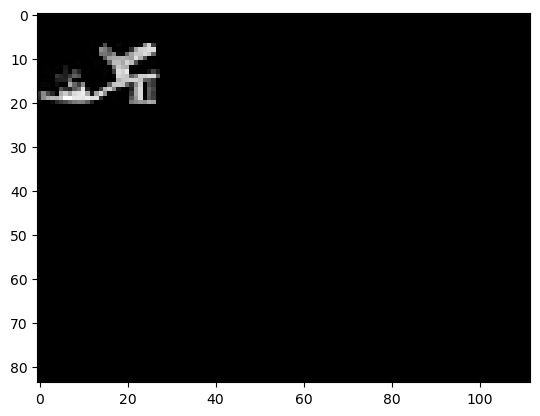

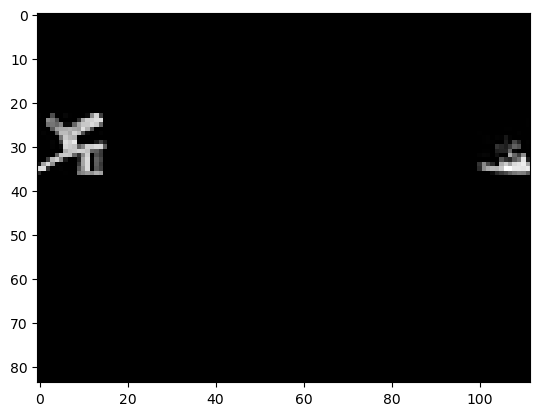

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from random import randint
from copy import deepcopy

rand_x = randint(14, 27)
rand_y = randint(27, 28*3-1)
print("new start position [x, y] = [", rand_x,",", rand_y, "]")

rand_start = deepcopy(aug_sample)
plt.imshow(rand_start, cmap='gray')
pause(0.1)

# initial movement
for i in range(28):
    for j in range(28):
        rand_start[rand_y-i][rand_x-j] = rand_start[27-i][27-j]

# clean other part
rand_start[:rand_y-28+1, :] = 0
rand_start[:, rand_x+1:rand_x+28+1] = 0

plt.imshow(rand_start, cmap='gray')


### single bounding box testing 

In [11]:
def box(col, row, box_x, box_y):    # position + length / width (visualization usage)
    view = torch.zeros([28*3, 28*4], dtype=torch.float32)
    # set the box, outside the target with one pixel
    view[row-box_y:row+1, col-box_x] = 1
    view[row-box_y:row+1, col] = 1
    view[row-box_y, col-box_x:col+1] = 1
    view[row, col-box_x:col+1] = 1
    return view

new start position [x, y] = [ 20 , 39 ]


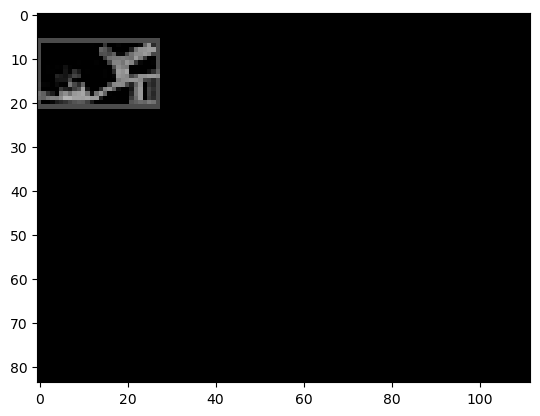

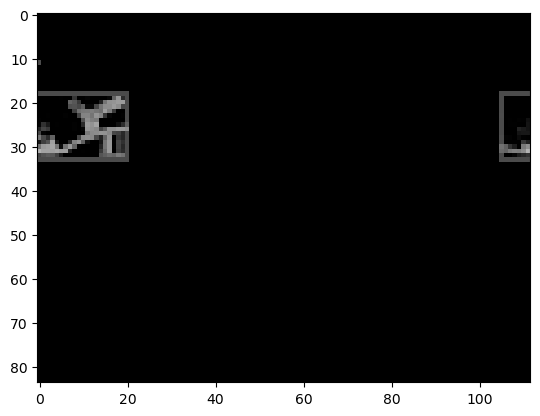

In [12]:
import torch
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from random import randint
from copy import deepcopy

rand_x = randint(14, 27)
rand_y = randint(27, 28*3-1)
print("new start position [x, y] = [", rand_x,",", rand_y, "]")

rand_start = deepcopy(aug_sample)
box_origin = box(27, 21, 27, 15)    # array for visualization, the only manual input part
box_sample = deepcopy(box_origin)

plt.imshow(rand_start, cmap='gray')
plt.imshow(box_origin, cmap='gray', alpha=0.3)
pause(0.1)

# initial movement
for i in range(28):
    for j in range(28):
        rand_start[rand_y-i][rand_x-j] = rand_start[27-i][27-j]

for i in range(29):
    for j in range(29):
        box_origin[rand_y-i+1][rand_x-j+1] = box_origin[28-i][28-j]

# clean other part
rand_start[:rand_y-28+1, :] = 0
rand_start[:, rand_x+1:rand_x+28+1] = 0
box_origin[:rand_y-28, :] = 0       # 1-pixel cleaning region difference
box_origin[:, rand_x+1:rand_x+28+1] = 0

plt.imshow(rand_start, cmap='gray')
plt.imshow(box_origin, cmap='gray', alpha=0.3)
pause(0.1)


### move sequencially

torch.Size([84, 112])


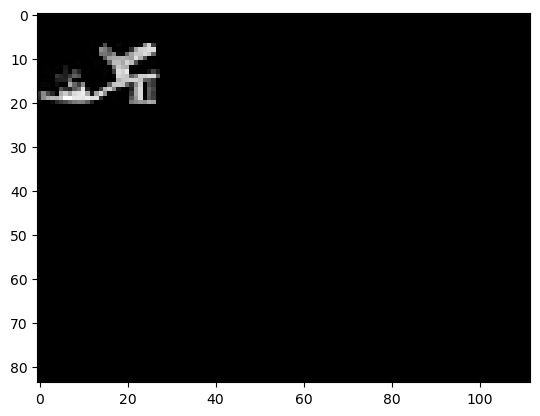

torch.Size([2, 84, 112])


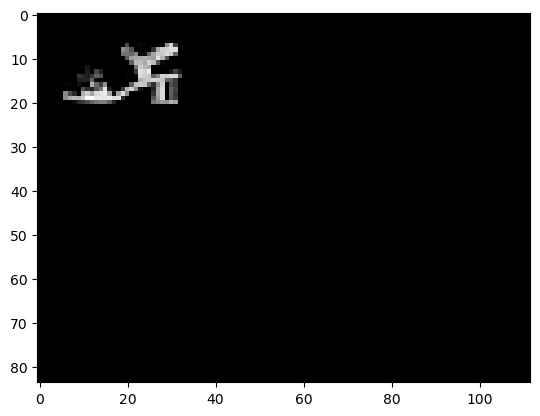

torch.Size([3, 84, 112])


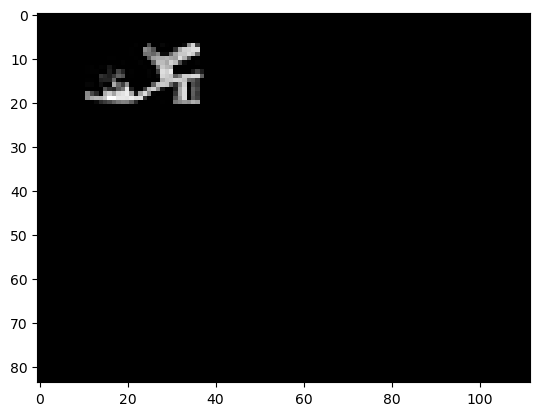

torch.Size([4, 84, 112])


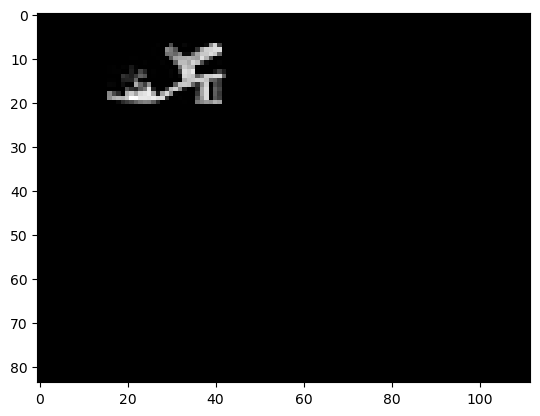

torch.Size([5, 84, 112])


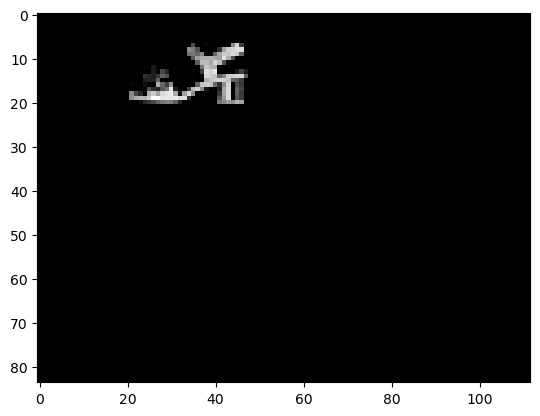

torch.Size([6, 84, 112])


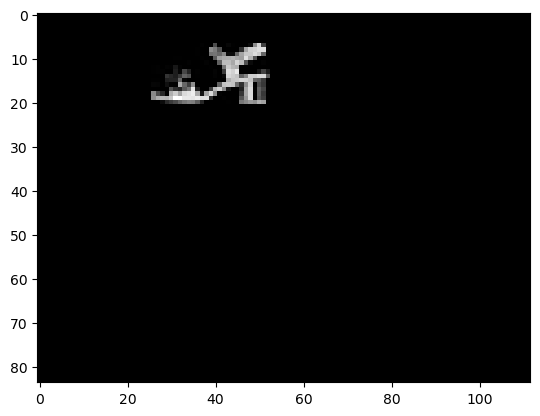

torch.Size([7, 84, 112])


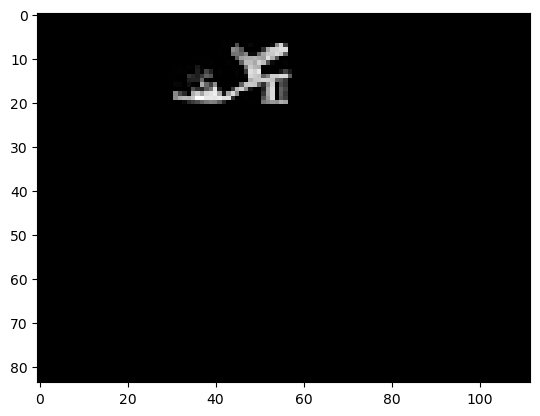

torch.Size([8, 84, 112])


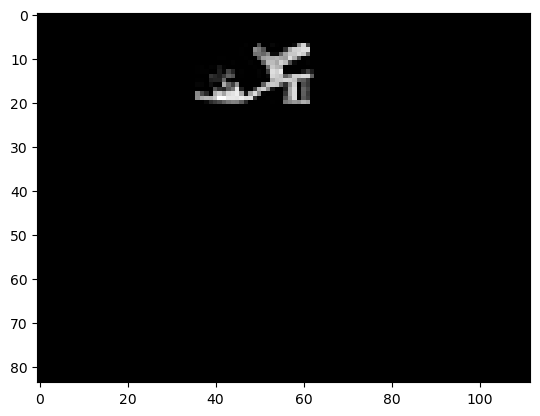

torch.Size([9, 84, 112])


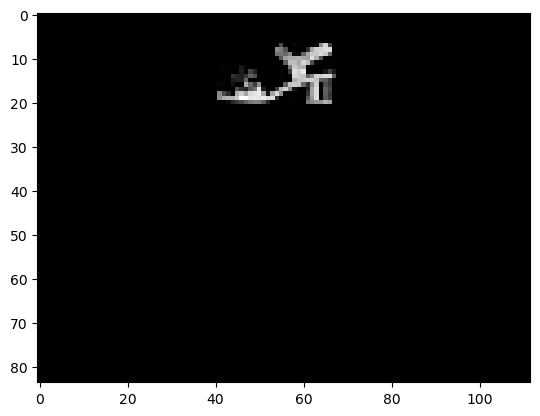

torch.Size([10, 84, 112])


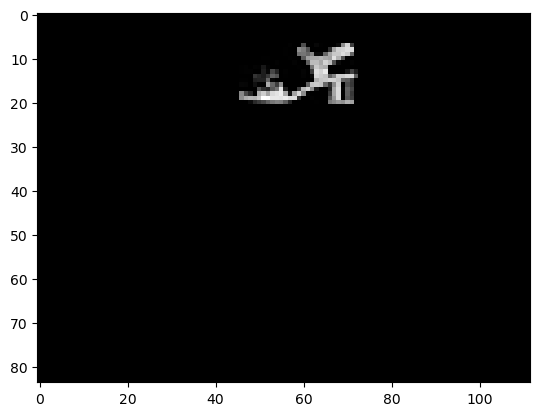

torch.Size([11, 84, 112])


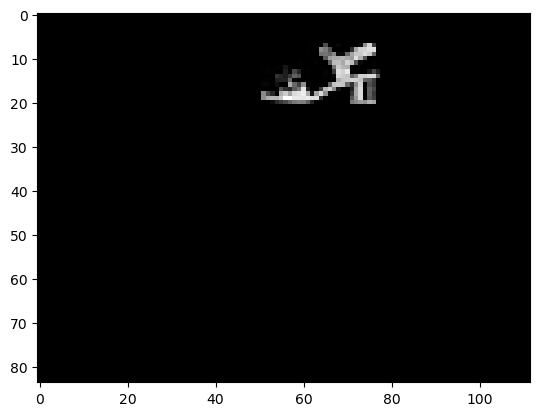

torch.Size([12, 84, 112])


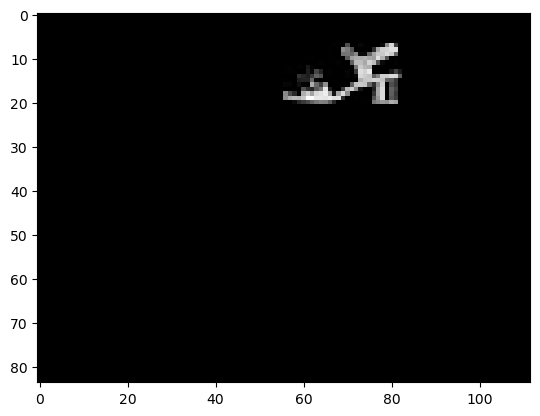

torch.Size([13, 84, 112])


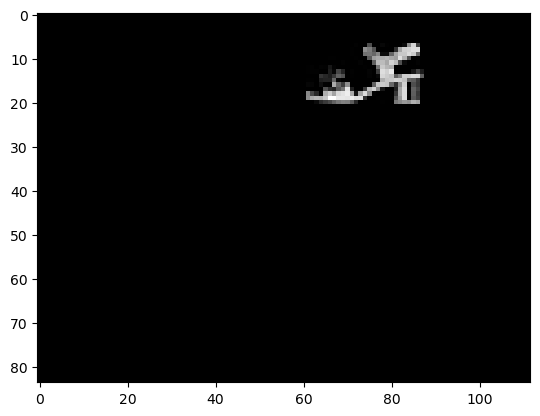

torch.Size([14, 84, 112])


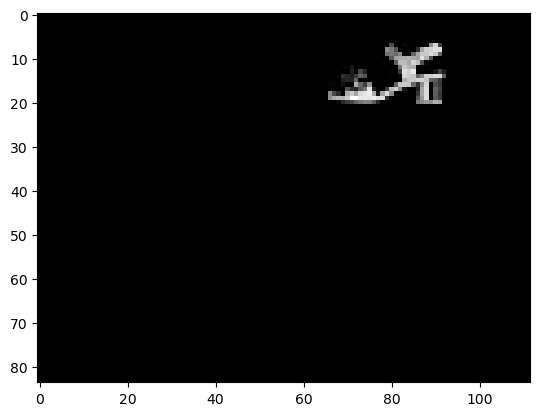

torch.Size([15, 84, 112])


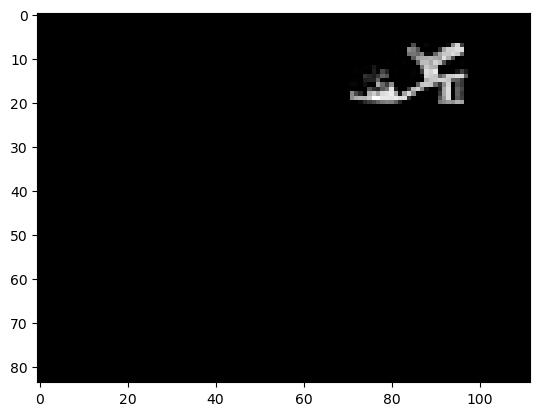

torch.Size([16, 84, 112])


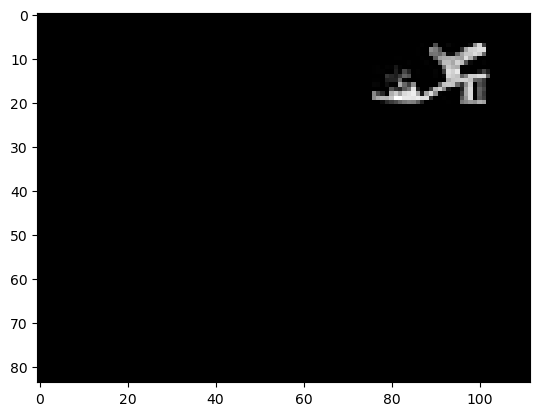

torch.Size([17, 84, 112])


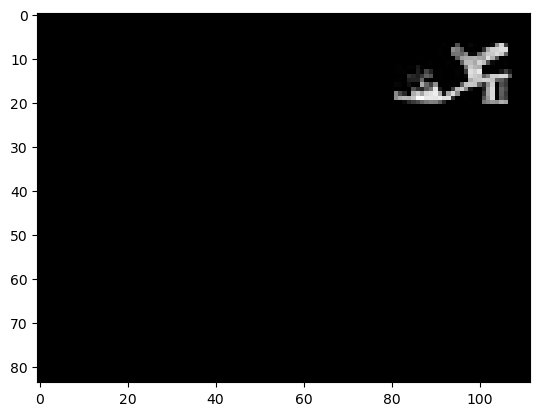

In [13]:
from math import floor
from torch import stack
from torch import cat
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from copy import deepcopy

# initialization
stride = 5
first_frame = deepcopy(aug_sample)
next_frame = deepcopy(aug_sample)
y = deepcopy(aug_sample)

# show info
print(y.size())
plt.imshow(y, cmap='gray')
pause(0.1)

for i in range(floor((112-28)/stride)):
   # moving part (1-dim only)
   for j in range(28):
      next_frame[:, 28+stride*(i+1)-(j+1)] = next_frame[:, 28+stride*i-(j+1)]
   next_frame[:, :stride*(i+1)+1] = 0  # clean other area
   
   # sequencing part
   if i == 0:
      y = stack((first_frame, next_frame)) 
   else:
      y = cat((y, next_frame.reshape(1, 28*3, 28*4)), dim=0)
      
   # show info
   print(y.size())
   plt.imshow(y[i+1], cmap='gray')
   pause(0.1)

### parellel random movement and re-concat for last frames

new start position [x, y] = [ 15 , 59 ]


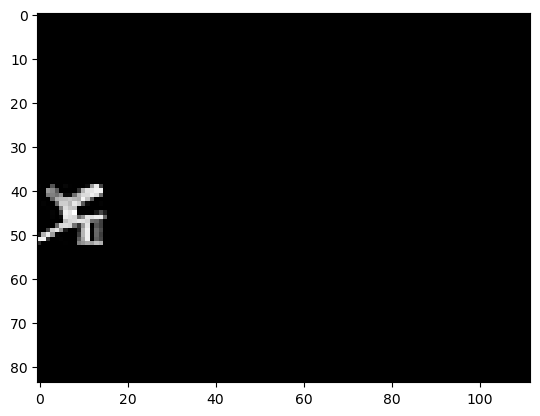

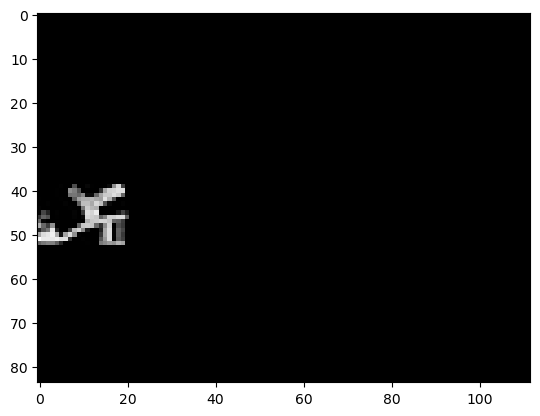

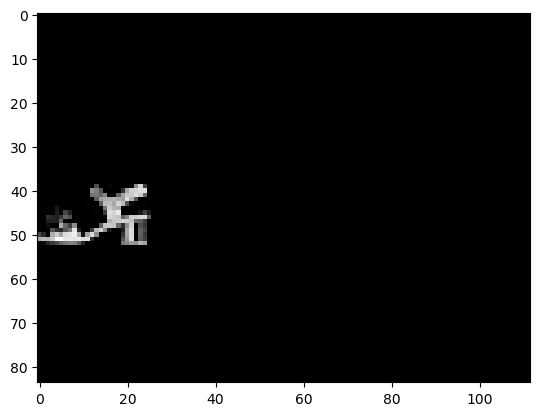

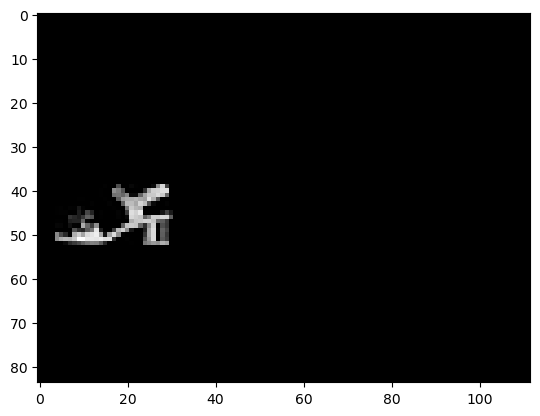

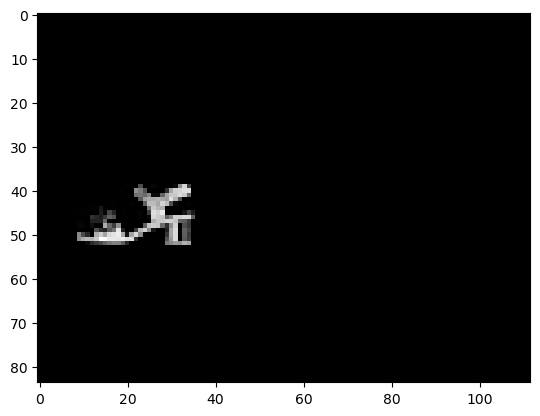

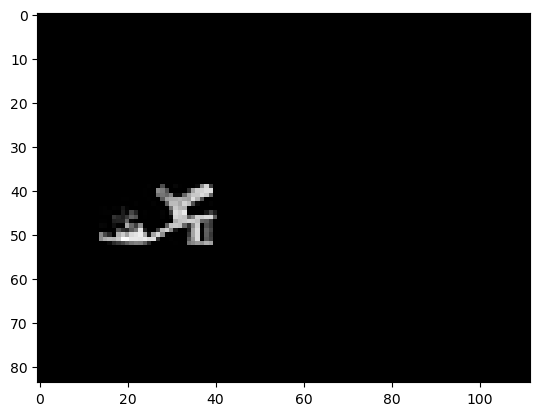

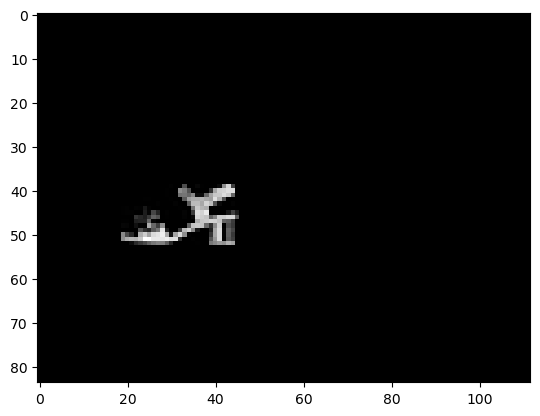

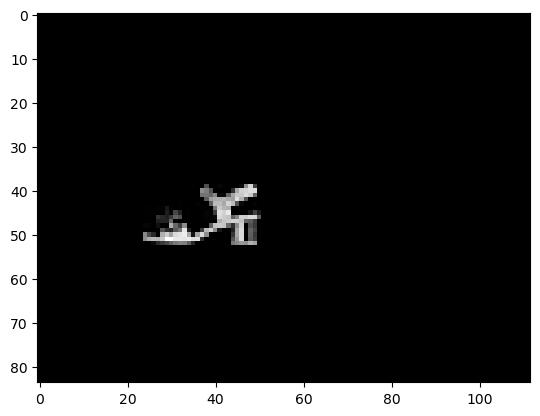

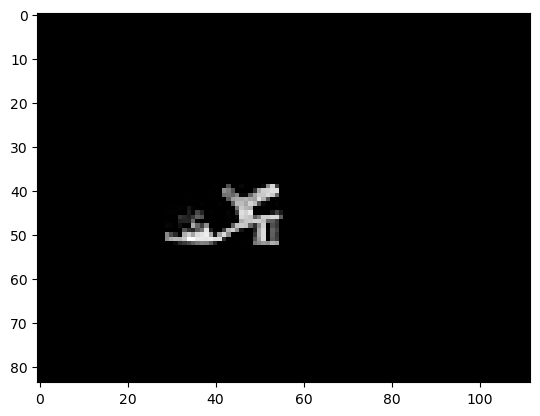

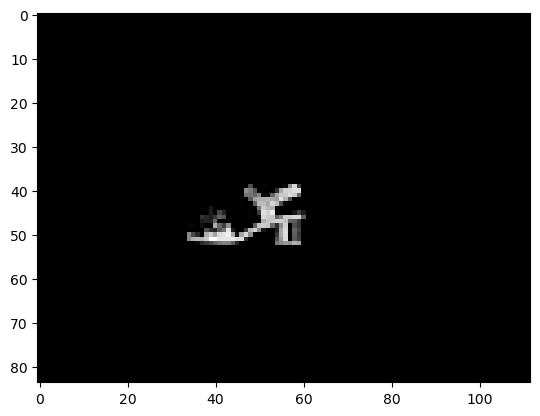

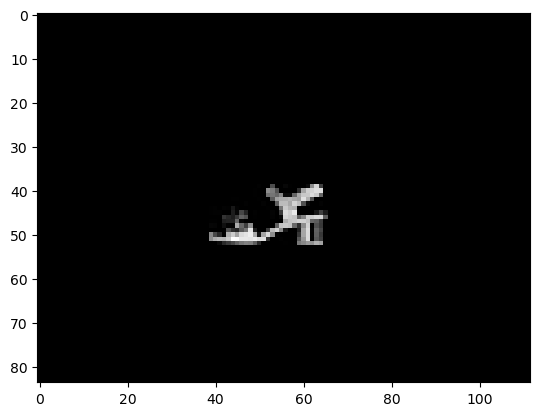

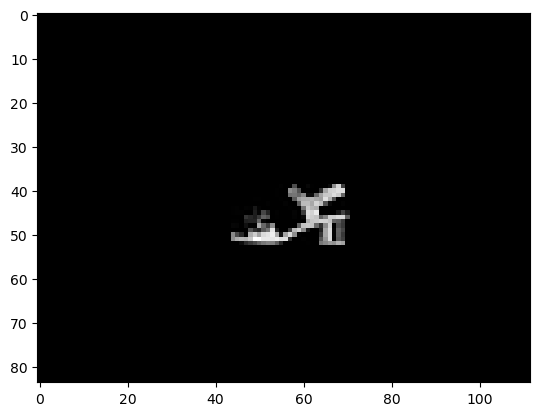

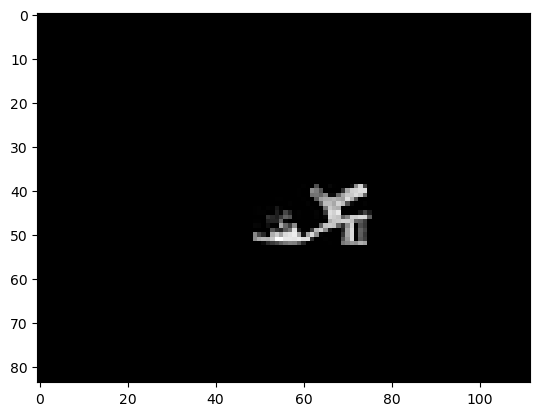

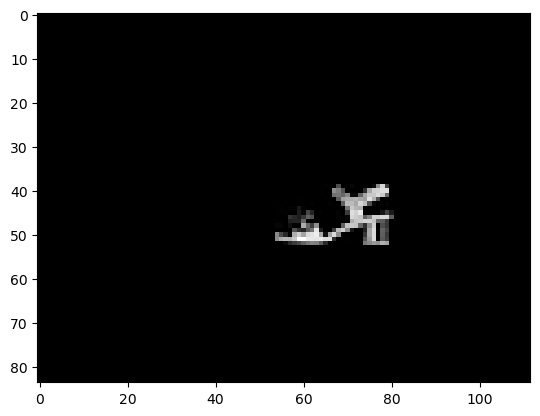

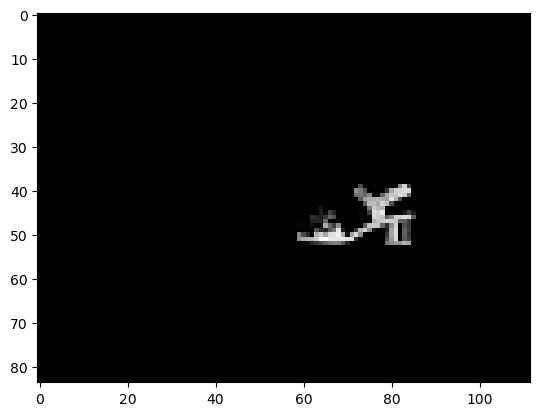

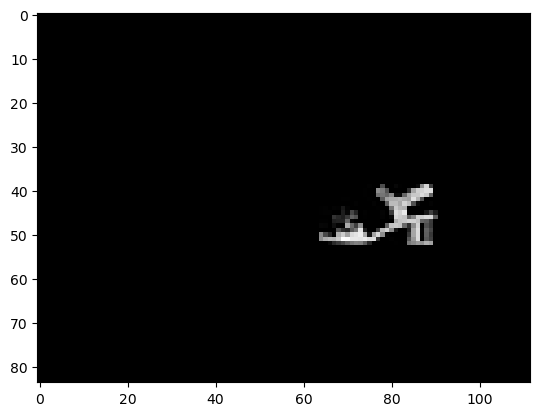

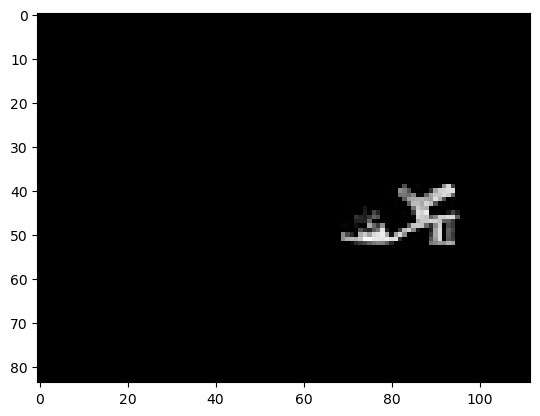

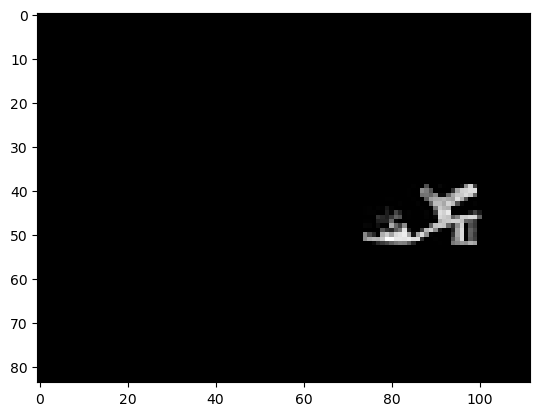

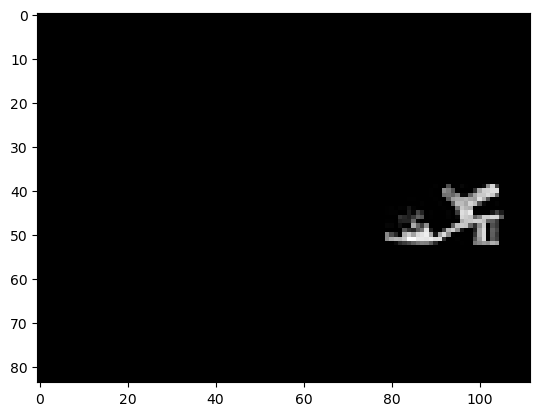

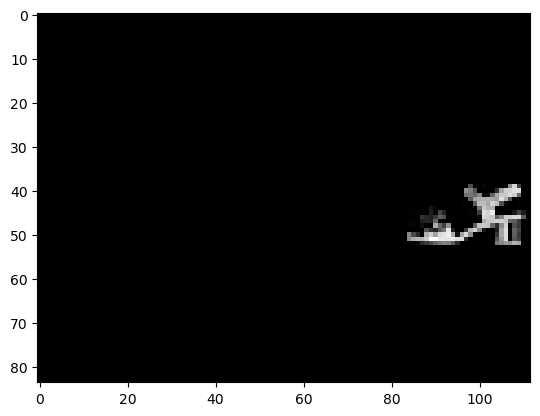

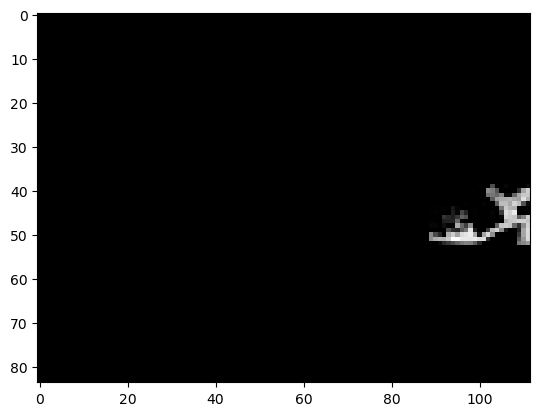

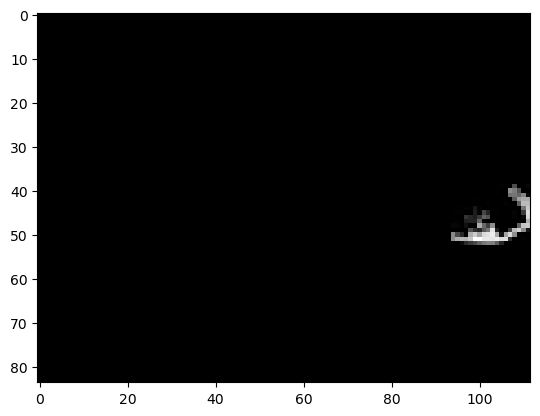

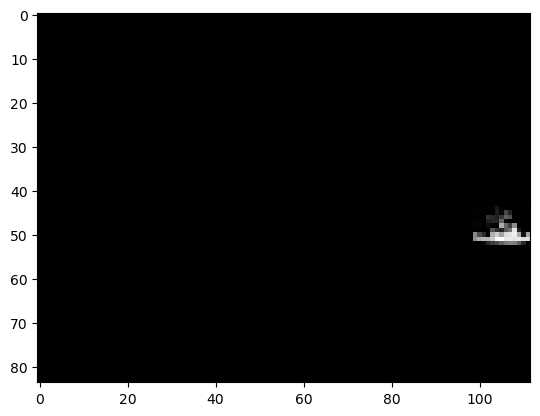

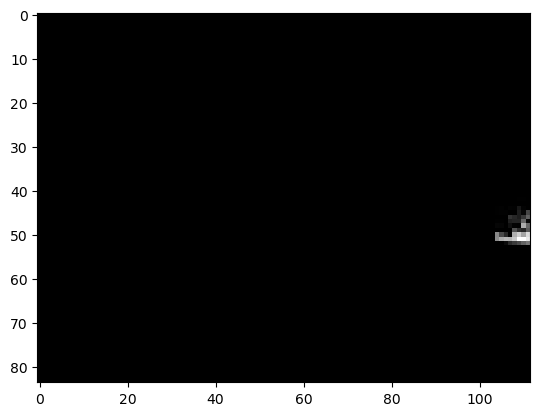

torch.Size([24, 84, 112])


In [14]:
from math import floor, ceil
from torch import cat
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from copy import deepcopy

y_moved = deepcopy(y)
rand_x = randint(14, 27)
rand_y = randint(27, 28*3-1)
print("new start position [x, y] = [", rand_x,",", rand_y, "]")

# all frames move left parellel
for i in range(floor((112-28)/stride)+1):
   for j in range(28):
      for k in range(28):
         y_moved[i][rand_y-j][rand_x+stride*i-k] = y_moved[i][27-j][27+stride*i-k]
   
   # clean other area
   y_moved[i][:rand_y-28+1, :] = 0
   y_moved[i][:, rand_x+stride*i+1:] = 0
   
   # show info
   plt.imshow(y_moved[i], cmap='gray')
   pause(0.1)

# initialization
frame_old = len(y_moved)   # number of old frames
next_frame = deepcopy(y_moved[len(y_moved)-1])

# last frame moves right and cat
for i in range(ceil((28-rand_x)/stride)*2+1):
   for j in range(28):
      if rand_x+stride*(frame_old+i)-j < 112:
         next_frame[:, rand_x+stride*(frame_old+i)-j] = next_frame[:, rand_x+stride*(frame_old+i-1)-j]
   next_frame[:, :rand_x+stride*(frame_old+i)-28+1] = 0  # clean other area
   y_moved = cat((y_moved, next_frame.reshape(1, 28*3, 28*4)), dim=0)
   
   # show info
   plt.imshow(y_moved[frame_old+i], cmap='gray')
   pause(0.1)

print(y_moved.size())

### sequential bounding box visualization and random position

In [15]:
from math import floor, ceil
from torch import cat
import matplotlib.pyplot as plt
from matplotlib.pyplot import pause
from copy import deepcopy

sequential box preparation

torch.Size([84, 112])


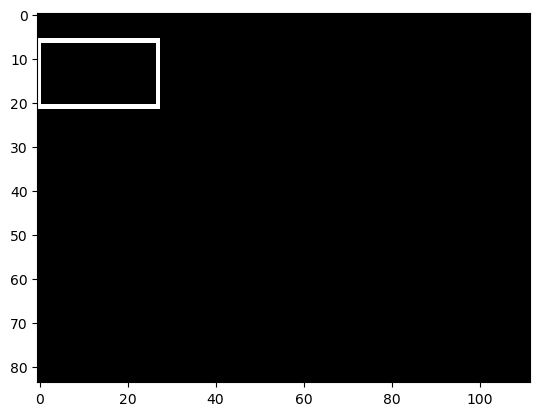

In [16]:
# initialization
stride = 5
first_frame = deepcopy(box_sample)
next_frame = deepcopy(box_sample)
y_box = deepcopy(box_sample)

# show info
print(y_box.size())
plt.imshow(y_box, cmap='gray')
pause(0.1)

for i in range(floor((112-28)/stride)):
   # moving part (1-dim only)
   for j in range(30):  # bigger range to cover bounding box
      next_frame[:, 30+stride*(i+1)-(j+1)] = next_frame[:, 30+stride*i-(j+1)]
   next_frame[:, :stride*(i+1)] = 0  # clean other area
   
   # sequencing part
   if i == 0:
      y_box = stack((first_frame, next_frame)) 
   else:
      y_box = cat((y_box, next_frame.reshape(1, 28*3, 28*4)), dim=0)
      
   # # show info
   # print(y_box.size())
   # plt.imshow(y_box[i+1], cmap='gray')
   # pause(0.1)

parallel moving and concat last frames

new start position [x, y] = [ 25 , 62 ]


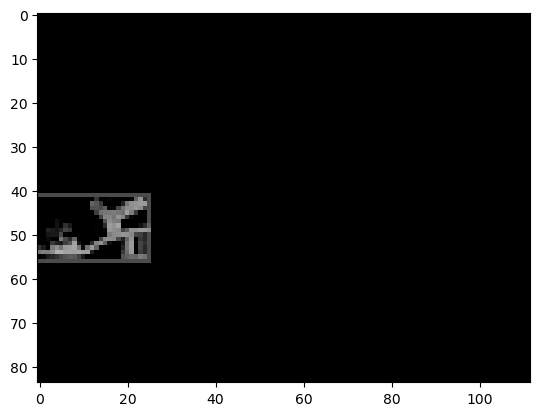

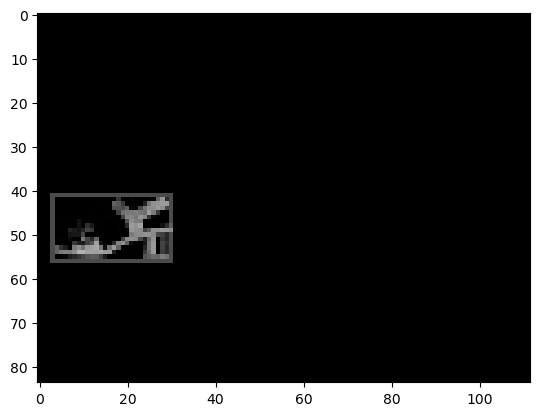

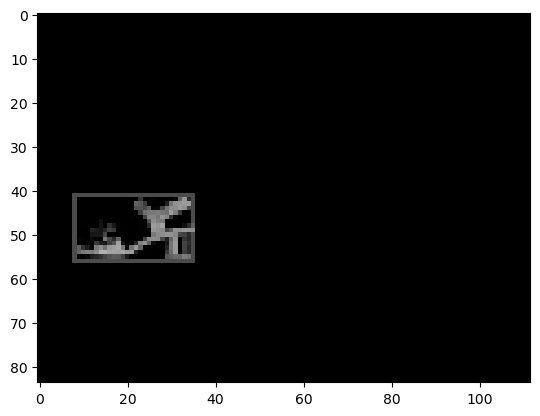

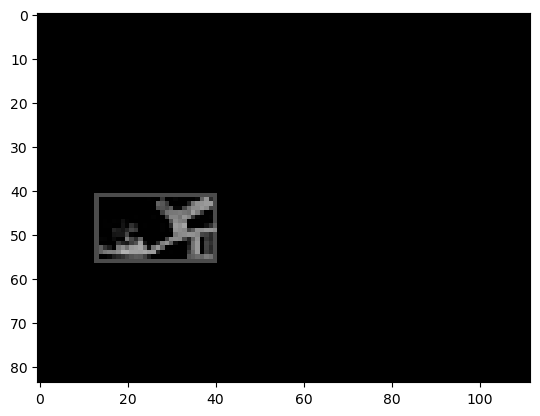

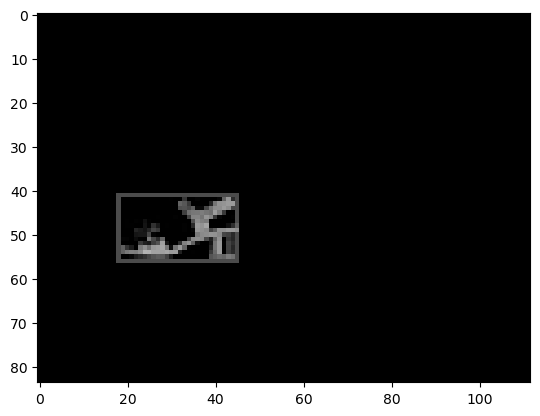

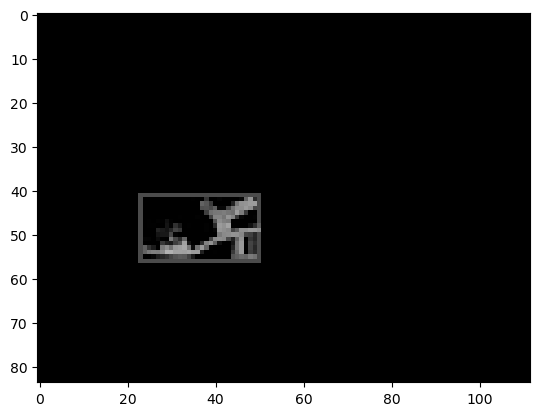

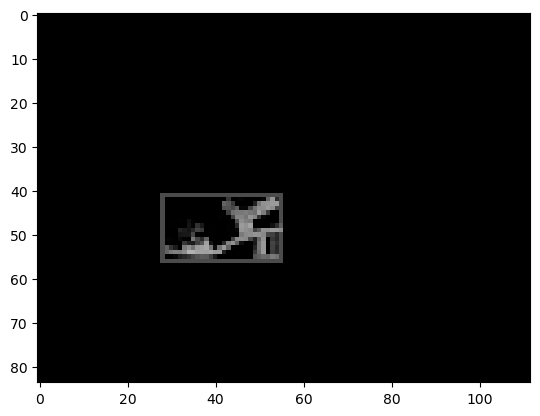

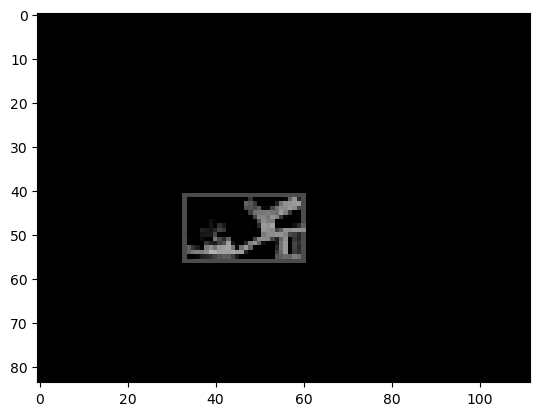

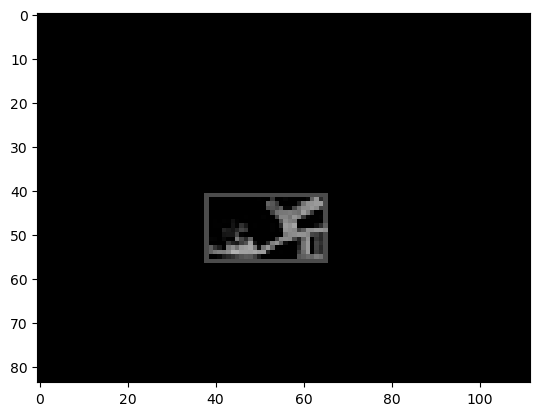

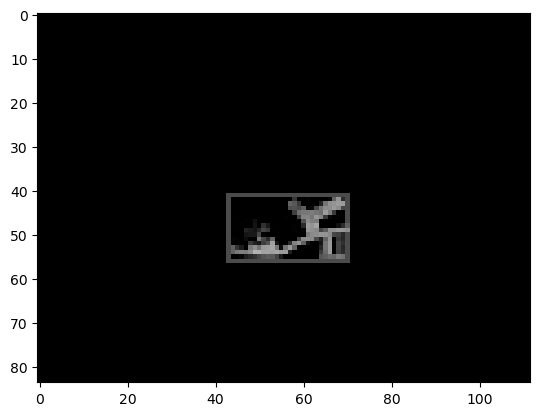

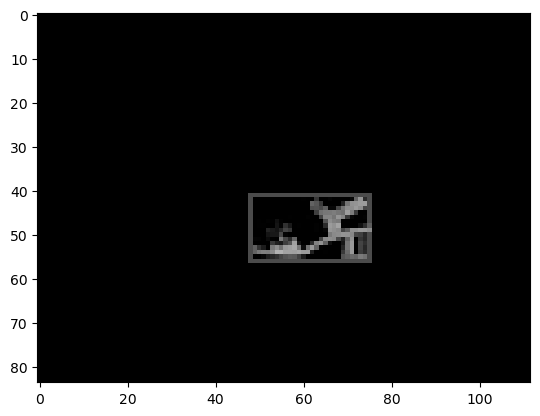

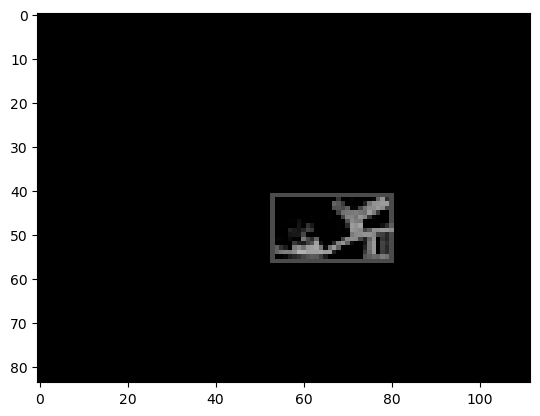

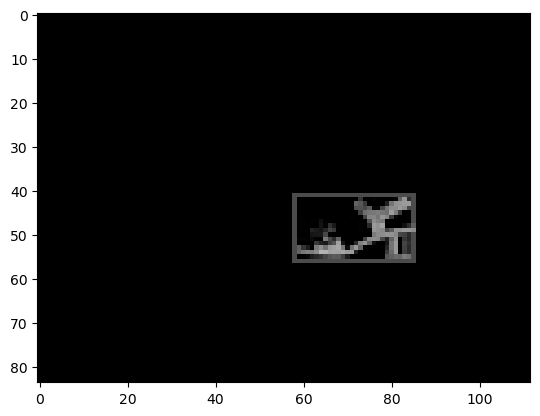

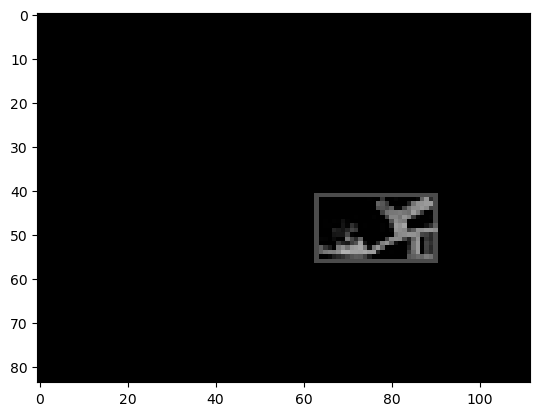

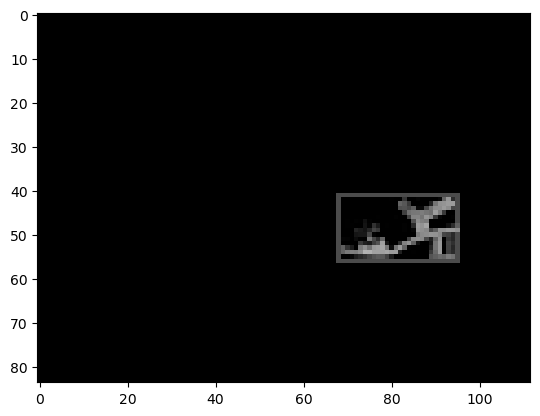

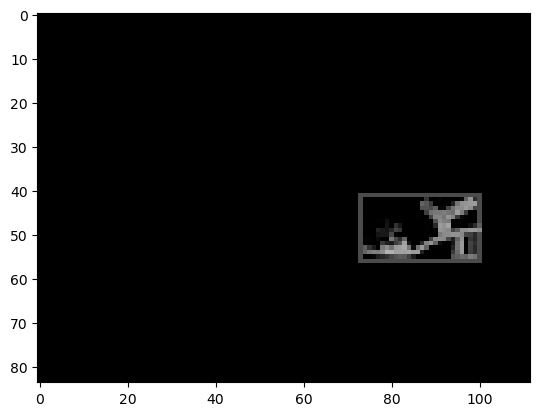

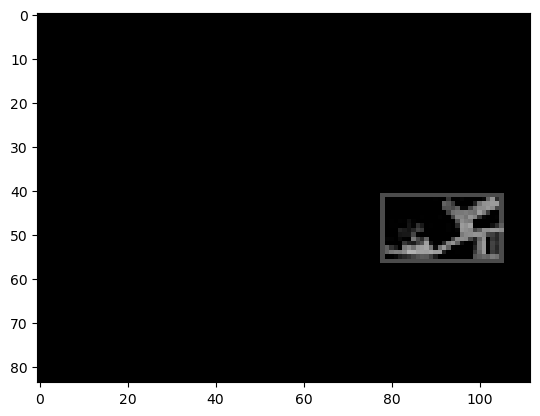

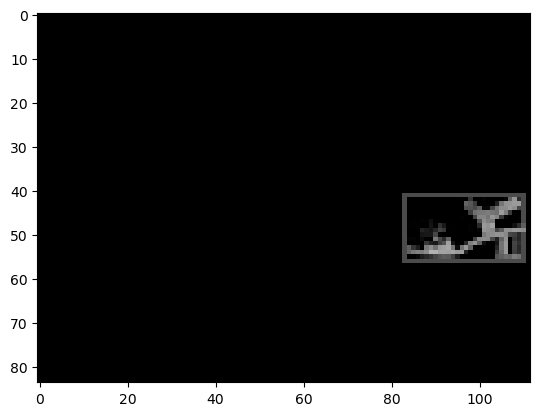

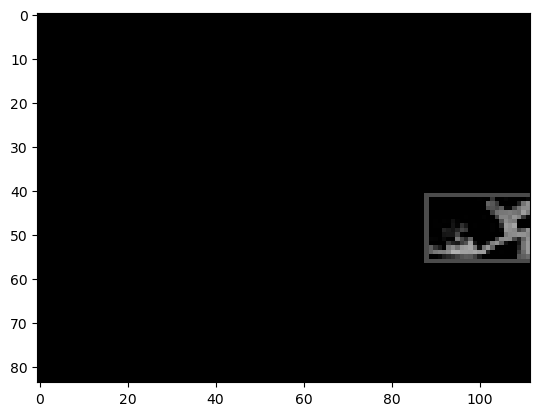

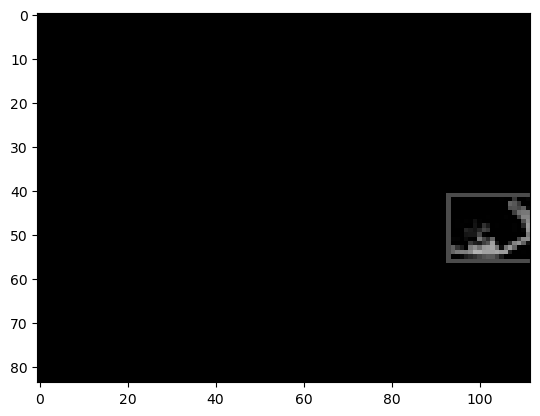

torch.Size([20, 84, 112])


In [17]:
# sequential data preparation
y_box_moved = deepcopy(y_box)
y_moved = deepcopy(y)
rand_x = randint(14, 27)
rand_y = randint(27, 28*3-1)
print("new start position [x, y] = [", rand_x,",", rand_y, "]")

# # visualization for no parallel movement
# for i in range(len(y_box_moved)):
#     plt.imshow(y_moved[i], cmap='gray')
#     plt.imshow(y_box_moved[i], cmap='gray', alpha=0.3)
#     pause(0.1)

# all frames move left parellel
for i in range(floor((112-28)/stride)+1): 
    # moving items
    for j in range(28):
        for k in range(28):
            y_moved[i][rand_y-j][rand_x+stride*i-k] = y_moved[i][27-j][27+stride*i-k]
    # moving box
    for j in range(29):
        for k in range(29):
            y_box_moved[i][rand_y-j+1][rand_x+stride*i-k+1] = y_box_moved[i][28-j][28+stride*i-k]
          
    # clean other area
    y_moved[i][:rand_y-28+1, :] = 0
    y_moved[i][:, rand_x+stride*i+1:] = 0
    y_box_moved[i][:rand_y-28+1, :] = 0
    y_box_moved[i][:, rand_x+stride*i+1:] = 0
   
    # show info
    plt.imshow(y_moved[i], cmap='gray')
    plt.imshow(y_box_moved[i], cmap='gray', alpha=0.3)
    pause(0.1)

# initialization
frame_old = len(y_moved)   # number of old frames
next_frame = deepcopy(y_moved[frame_old-1])
next_frame_box = deepcopy(y_box_moved[frame_old-1])

# last frame moves right and cat
for i in range(ceil((28-rand_x)/stride)*2+1):
    # move next frame
    for j in range(28):
        if rand_x+stride*(frame_old+i)-j < 112:
           next_frame[:, rand_x+stride*(frame_old+i)-j] = next_frame[:, rand_x+stride*(frame_old+i-1)-j]
    for j in range(29):
        if rand_x+stride*(frame_old+i)-j+1 < 112:
           next_frame_box[:, rand_x+stride*(frame_old+i)-j+1] = next_frame_box[:, rand_x+stride*(frame_old+i-1)-j+1]
    # clean and cat
    next_frame[:, :rand_x+stride*(frame_old+i)-28+1] = 0
    y_moved = cat((y_moved, next_frame.reshape(1, 28*3, 28*4)), dim=0)
    next_frame_box[:, :rand_x+stride*(frame_old+i)-28+1] = 0
    y_box_moved = cat((y_box_moved, next_frame_box.reshape(1, 28*3, 28*4)), dim=0)
   
    # show info
    plt.imshow(y_moved[frame_old+i], cmap='gray')
    plt.imshow(y_box_moved[frame_old+i], cmap='gray', alpha=0.3)
    pause(0.1)

print(y_moved.size())